In [1]:
import psycopg2
from pandas import DataFrame
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Connect database with the set credentials in PG
db_connection = psycopg2.connect(
    user="tester",
    password="1234",
    host="localhost",
    port="5432",
    database="ThesisTry1"
)

#updated query
query = """
SELECT SE."Bruttoleistung"
from wind_extended as SE;
"""
# Create a cursor and execute the query
cursor = db_connection.cursor()
cursor.execute(query)

# Fetch all the rows from the result
results = cursor.fetchall()

df = DataFrame(results)

df.columns = ['Brutto']

# Drop rows with missing longitude or latitude values
df = df.dropna()
df['q'] = (df['Brutto'])
display(df)
brutto_sum = df['Brutto'].sum()
print("BruttoLeistung: ", brutto_sum)
print("Average Q: ", df['q'].mean())
df['q'].to_csv('qratio.csv', index=False)

,Brutto,q
0,3000.0,3000.0
1,3000.0,3000.0
2,3000.0,3000.0
3,3000.0,3000.0
4,2400.0,2400.0
...,...,...
34789,3600.0,3600.0
34790,5500.0,5500.0
34791,600.0,600.0
34792,7.5,7.5


BruttoLeistung:  83328588.29699999
Average Q:  2394.912579668908


In [7]:
#Just excluding the biggest outliers. But not all. Just over 2000 & AnzahlModule 500
#This is just to show the x axis with interval of 50 and y with logarithmic scale


#display(df)
q_df = df.copy()

#q_df['q'] = (q_df['Brutto'] / q_df['AnzahlModule']) * 1000
# Filter rows where both 'Bruttoleistung' and 'AnzahlModule' are less than 10000
q_df = q_df[(q_df['Brutto'] < 20000) & (q_df['Brutto'] > 100)] 

# Display the modified DataFrame
display(q_df)

# Calculate the total sum for 'Bruttoleistung' 
total_brutto_sum = q_df['Brutto'].sum()

print(f'Total Brutto sum: {total_brutto_sum}')


,Brutto,q
0,3000.0,3000.0
1,3000.0,3000.0
2,3000.0,3000.0
3,3000.0,3000.0
4,2400.0,2400.0
...,...,...
34787,5500.0,5500.0
34788,5500.0,5500.0
34789,3600.0,3600.0
34790,5500.0,5500.0


Total Brutto sum: 83290667.5


In [11]:
#Just excluding the biggest outliers. But not all. Just over 2000 & AnzahlModule 500
#This is just to show the x axis with interval of 50 and y with logarithmic scale


#display(df)
q_df = df.copy()

#q_df['q'] = (q_df['Brutto'] / q_df['AnzahlModule']) * 1000
# Filter rows where both 'Bruttoleistung' and 'AnzahlModule' are less than 10000
q_df = q_df[(q_df['Brutto'] > 20000) | (q_df['Brutto'] < 100)] 

# Display the modified DataFrame
display(q_df)

# Calculate the total sum for 'Bruttoleistung' 
total_brutto_sum_outliers = q_df['Brutto'].sum()

print(f'Total Brutto sum: {total_brutto_sum_outliers}')

,Brutto,q
39,6.0,6.0
79,29.8,29.8
98,10.0,10.0
121,1.0,1.0
125,1.0,1.0
...,...,...
34782,3.0,3.0
34783,5.0,5.0
34784,1.0,1.0
34792,7.5,7.5


Total Brutto sum: 16820.797000000002


In [15]:
#Total energy outliers in wind
error_rate = total_brutto_sum_outliers/brutto_sum
print(error_rate * 100, "%")

0.020186105805665724 %


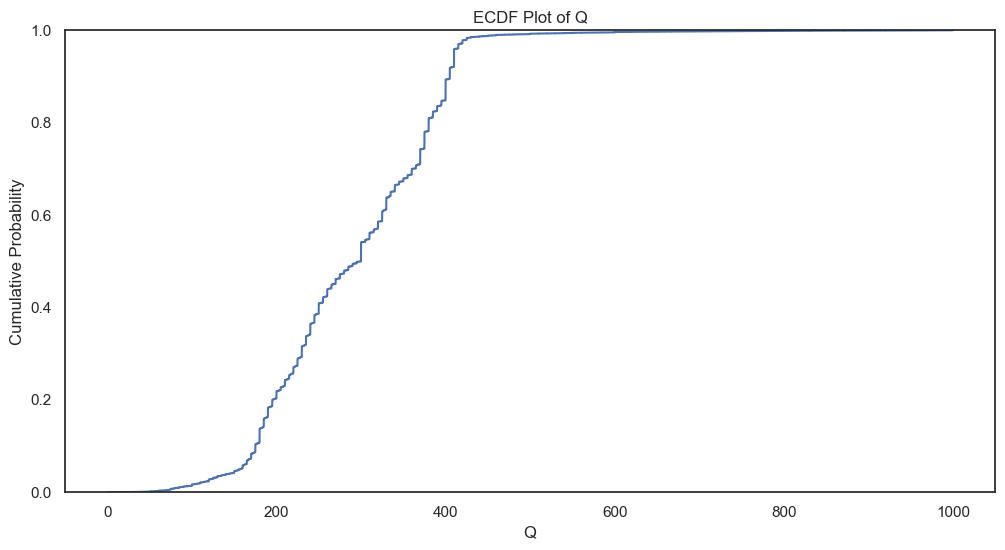

In [7]:
#Without_outliers
# Create a new DataFrame containing rows where 'q' is not between 300 and 500
#filtered_df = df[(df['q'] < 1000) & (df['q'] >0)].copy()
filtered_df = filtered_df[(filtered_df['Brutto'] < 2000) & (filtered_df['AnzahlModule'] < 500)] 
# Plot ECDF using Seaborn
plt.figure(figsize=(12, 6))
#sns.displot(filtered_df['q'], kind="ecdf")
sns.ecdfplot(data=filtered_df, x='q')
plt.title('ECDF Plot of Q')
plt.xlabel('Q')
plt.ylabel('Cumulative Probability')
plt.show()